In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
x_first = np.linspace(start=0,stop=50,num=30)

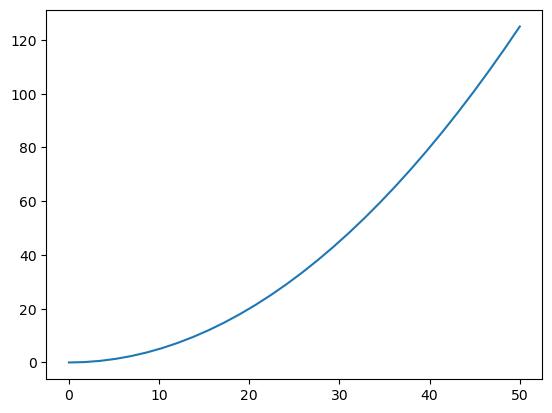

In [3]:
plt.plot(x_first, 0.05*x_first**2)

In [4]:
y = 0.05*x_first**2

In [5]:
y.shape

(30,)

In [6]:
for i in range(30):
    random=10*bernoulli.rvs(p=1/2)-1
    y[i] = y[i] + np.random.normal(loc=random, scale=20)

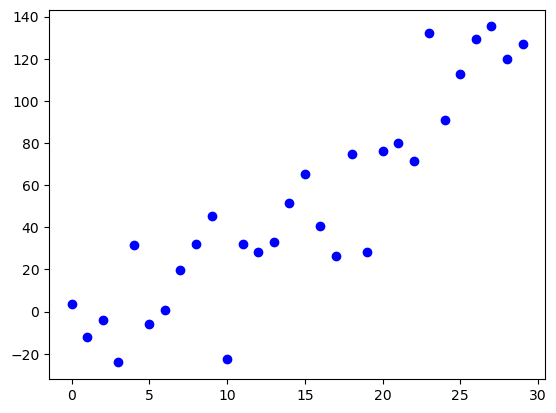

In [7]:
plt.plot(y,'bo')

In [8]:
def rbf_kernel(x=0,y=0,l=1):
    """to apply a rbf kernel

    Parameters
    --------------------------
    x : array-like
    a vector

    y : array-like
    a vector

    l : float
    scale parameter
    ---------------------------
    """
    d = np.exp(-(x-y)**2/(2*l**2))
    return d

In [9]:
matrix_K = np.empty((30,30))

In [10]:
for i in range(30):
    for j in range(30):
        matrix_K[i,j] = rbf_kernel(x=x_first[i],y=x_first[j],l=3)

In [11]:
inverse_mat = np.linalg.inv(matrix_K + 30*0.01*np.eye(30))

In [12]:
alpha_hat = np.matmul(np.transpose(y),inverse_mat)

In [13]:
x_test = np.linspace(start=0,stop=50,num=500)

In [14]:
def matrix_K_test(data,test,scale=1):
    """a function to create the test kernel matrix

    Parameters
    ---------------------------------
    data : array-like object,
    the data used to compute alpha_hat

    test : float (in this case, not an off-the-shelf function)
    the point to which we want to compute the distance

    scale : float, non zero
    the parameter to use in the kernel
    --------------------------------
    """
    dim = data.shape[0]
    mat = np.empty(dim)
    for i in range(dim):
        mat[i] = rbf_kernel(data[i],y=test,l=scale)
    return mat.reshape(dim,1)

In [15]:
list_of_output = np.zeros(500)
for i in range(500):
    list_of_output[i]=np.sum(alpha_hat[:]*matrix_K_test(data=x_first,test=x_test[i],scale=1)[:])

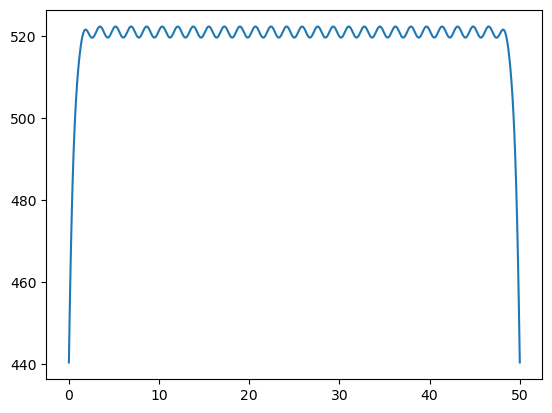

In [16]:
plt.plot(x_test,list_of_output)

So quite a lot of overfitting with these settings. 

In [17]:
list_of_output_bis = np.zeros(500)
for i in range(500):
    list_of_output_bis[i]=np.sum(alpha_hat[:]*matrix_K_test(data=x_first,test=x_test[i],scale=3)[:])

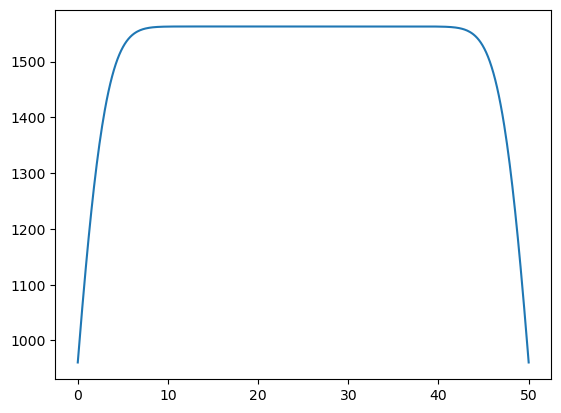

In [18]:
plt.plot(x_test,list_of_output_bis)

It's a bit 'better'.

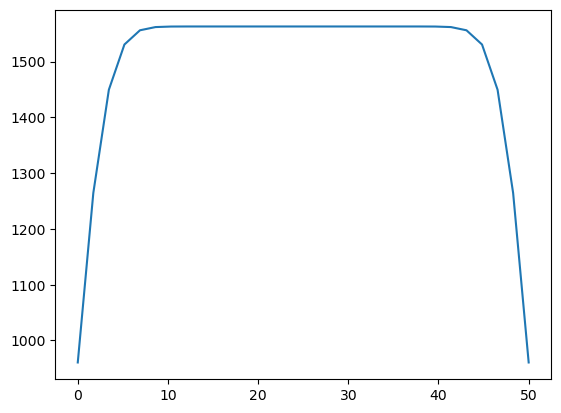

In [19]:
x_test_bis = np.linspace(start=0, stop=50, num=30)
list_of_output_ter = np.zeros(30)
for i in range(30):
    list_of_output_ter[i]=np.sum(alpha_hat[:]*matrix_K_test(data=x_first,test=x_test_bis[i],scale=3)[:])

plt.plot(x_test_bis,list_of_output_ter)

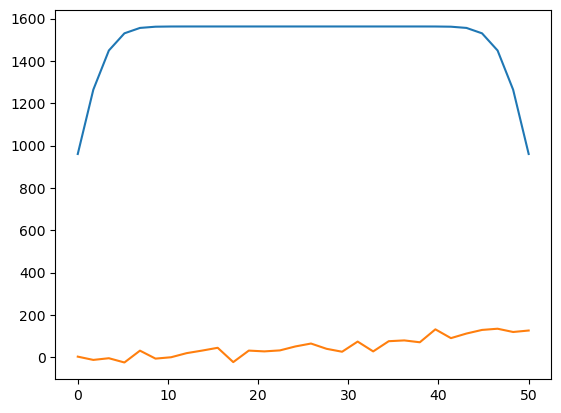

In [20]:
plt.plot(x_first,list_of_output_ter)
plt.plot(x_first,y)

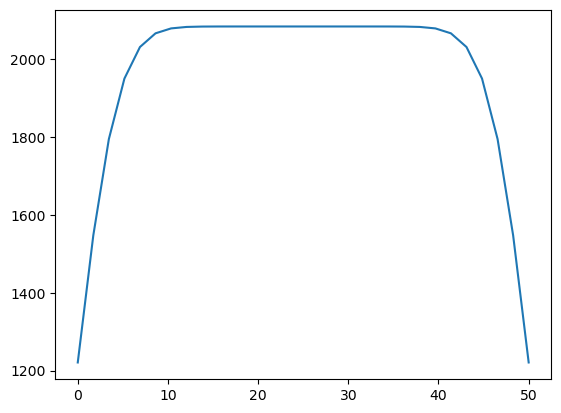

In [21]:
list_of_output_bibis = np.zeros(30)
for i in range(30):
    list_of_output_bibis[i]=np.sum(alpha_hat[:]*matrix_K_test(data=x_first,test=x_first[i],scale=4)[:])

plt.plot(x_first,list_of_output_bibis)

In [22]:
np.sum(np.array((1,1,3,1))[:]*np.array((0,0,5,7))[:])

22

In [23]:
vroum = pd.read_csv('cars.csv')

In [24]:
test_sentence = 'lalila yes no maybe 8 i [dont know 32]'

In [25]:
test_list = test_sentence.split('[')

In [26]:
test_list

['lalila yes no maybe 8 i ', 'dont know 32]']

In [27]:
vroum.head()

,Speed,Distance
0,"Quantity[4, ""Miles""/""Hours""]","Quantity[2, ""Feet""]"
1,"Quantity[4, ""Miles""/""Hours""]","Quantity[10, ""Feet""]"
2,"Quantity[7, ""Miles""/""Hours""]","Quantity[4, ""Feet""]"
3,"Quantity[7, ""Miles""/""Hours""]","Quantity[22, ""Feet""]"
4,"Quantity[8, ""Miles""/""Hours""]","Quantity[16, ""Feet""]"


In [28]:
for columns in vroum.columns:
    for i in range(vroum.shape[0]):
        temp = vroum.loc[i,columns].split('[')
        vroum.loc[i,columns] = temp[1]
        temp_bis = vroum.loc[i,columns].split(',')
        vroum.loc[i,columns] = temp_bis[0]


In [29]:
vroum['Speed'] = pd.to_numeric(vroum['Speed'])
vroum['Distance'] = pd.to_numeric(vroum['Distance'])
vroum.columns = ['speed','distance']

In [30]:
n_samples = vroum.shape[0]

In [31]:
mat_k = np.empty((n_samples,n_samples))

In [32]:
data_cars = np.array(vroum['speed'])

In [33]:
for i in range(n_samples):
    for j in range(n_samples):
        mat_k[i,j] = rbf_kernel(x=data_cars[i],y=data_cars[j])

In [34]:
inverse_mat_k = np.linalg.inv(mat_k + n_samples*0.01*np.eye(n_samples))

In [35]:
outcome = np.array(vroum['distance'])

In [36]:
alpha_hat_cars = np.matmul(np.transpose(outcome),inverse_mat_k)

In [37]:
k_star = np.empty((n_samples,200))

In [38]:
test_cars = np.linspace(start=0,stop=50,num=200)
for point in range(n_samples):
    for i in range(200):
        k_star[point,i] = rbf_kernel(x=data_cars[point],y=test_cars[i])

In [39]:
list_of_output_cars = np.empty(200)
for i in range(n_samples):
    list_of_output_cars[i] = np.sum(alpha_hat_cars[:]*k_star[:,i])

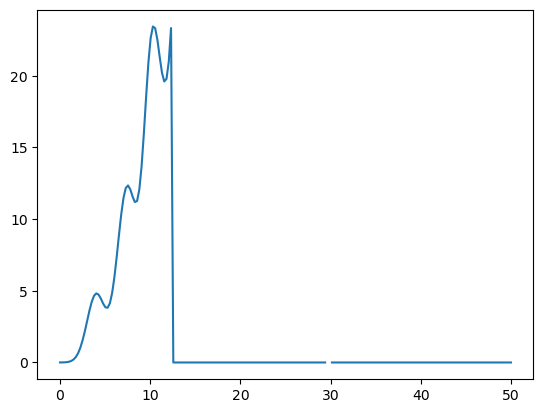

In [40]:
plt.plot(test_cars,list_of_output_cars)

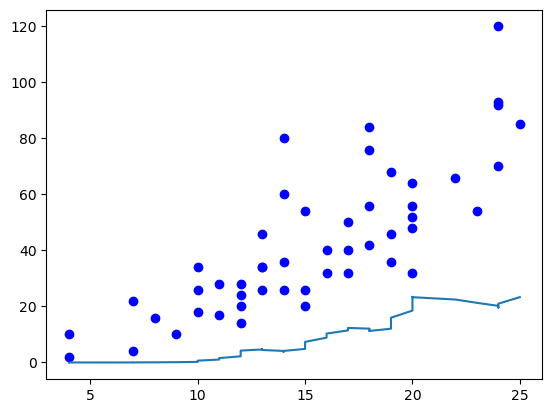

In [41]:
plt.plot(vroum['speed'],vroum['distance'],'bo')
plt.plot(vroum['speed'], list_of_output_cars[:50])

In [42]:
results = np.hstack((test_cars,list_of_output_cars))

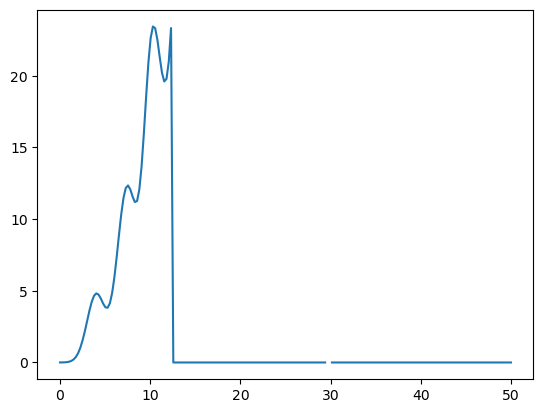

In [43]:
plt.plot(test_cars,list_of_output_cars)

In [44]:
alpha_hat_cars.shape

(50,)

In [45]:
def rbf_dim_1(x,y,l=1):
    """Gaussian kernel of dimension 1

    Parameters
    -------------------------------
    x : float
    a real number

    y : float
    a real number

    l: float, non zero
    a scale parameter
    -------------------------------
    """
    d = np.exp(-(x-y)**2/(2*l**2))
    return d

In [82]:
def kernel_mat(X,y,scale=1):
    """either the Gram matrix or the kernel matrix for the tests

    Parameters
    -------------------------
    X : 1-D array (here, might be 2-D)
    it is the data

    y : 1-D array or float
    either the same vector to compute the Gram matrix or the test input

    scale : float
    non-zero real number, scale parameter
    ----------------------
    """
    if type(y) != float and type(y) != int and type(y) != np.float64:
        row_size = X.shape[0]
        col_size = y.shape[0]
        K = np.empty((row_size, col_size))
        for row in range(row_size):
            for col in range(col_size):
                K[row,col] = rbf_dim_1(x=X[row],y=y[col],l=scale)
    else:
        row_size = X.shape[0]
        K = np.empty(row_size)
        for i in range(row_size):
            K[i] = rbf_dim_1(x=X[i],y=y,l=scale)
    return K

In [83]:
alpha_hat_cars_bis = np.matmul(np.transpose(outcome),
                               np.linalg.inv(kernel_mat(X=data_cars,y=data_cars,scale=1) + data_cars.shape[0]*0.01*np.eye(data_cars.shape[0])))


In [84]:
test_bis = np.linspace(start=0,stop=50,num=200)
y_star = np.empty(200)
for i in range(200):
    y_star[i] = np.sum(alpha_hat_cars_bis[:]*kernel_mat(X=data_cars,y=test_bis[i],scale=1)[:])

In [85]:
results = np.hstack((test_bis,y_star))

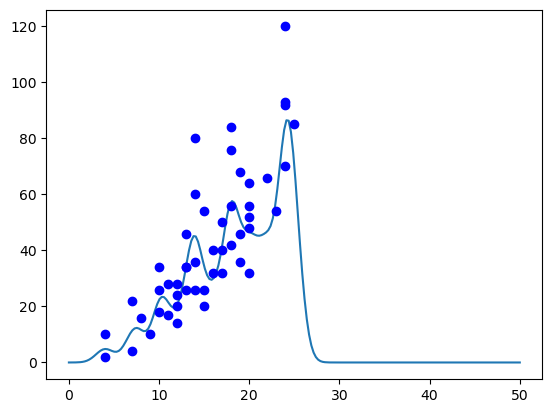

In [88]:
plt.plot(test_bis,y_star)
plt.plot(data_cars,outcome,'bo')